In [3]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Aplique nas imagens abaixo o algortimo Watershed para realizar a contagem de células. Faça tanto para  a imagem original e para a imagem gradiente

In [5]:
# Função para calcular o threshold de Otsu manualmente
def otsu_threshold(image):
    # Calcula o histograma da imagem
    hist, _ = np.histogram(image.ravel(), bins=256, range=(0, 256))
    total_pixels = image.size
    
    # Variáveis para calcular a probabilidade acumulada e média
    sumB = 0
    wB = 0
    sum1 = np.dot(np.arange(256), hist)
    var_max = 0.0
    threshold = 0
    
    # Loop para calcular a variância entre classes para cada threshold
    for i in range(256):
        wB += hist[i]  # Peso da classe background
        if wB == 0:
            continue
        wF = total_pixels - wB  # Peso da classe foreground
        if wF == 0:
            break
        sumB += i * hist[i]
        mB = sumB / wB  # Média da classe background
        mF = (sum1 - sumB) / wF  # Média da classe foreground
        var_between = wB * wF * (mB - mF) ** 2  # Variância entre classes
        
        # Maximiza a variância entre classes
        if var_between > var_max:
            var_max = var_between
            threshold = i

    return threshold

In [6]:
# Função para aplicar o threshold manual de Otsu
def apply_otsu_manual(image):
    threshold = otsu_threshold(image)
    # Aplica o threshold para segmentar a imagem
    _, imagem_binaria = cv2.threshold(image, threshold, 1, cv2.THRESH_BINARY)
    return imagem_binaria, threshold


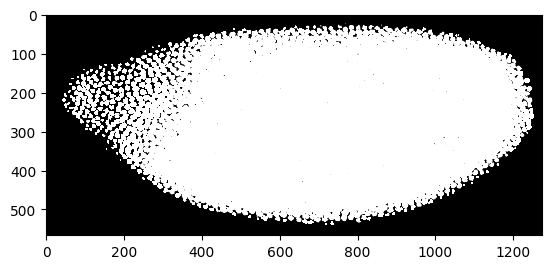

In [18]:
# Carrega a imagem em escala de cinza
img = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)

# Marca os componentes conectados
img_binarizada_otsu, threshold = apply_otsu_manual(img)
ret, markers = cv2.connectedComponents(img_binarizada_otsu)
plt.imshow(markers, cmap='gray', vmin=0, vmax=1)

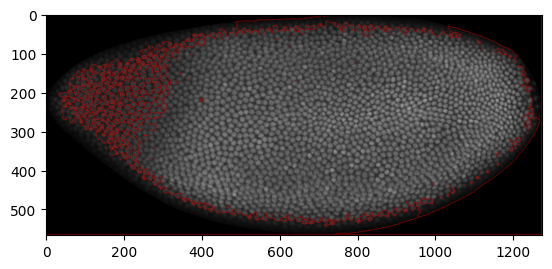

In [19]:
# Converte os marcadores para int32, como o Watershed espera
markers = np.int32(markers)

# Converte a imagem original para colorida (3 canais) para usar no Watershed
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Aplica o algoritmo Watershed
markers = cv2.watershed(img_color, markers)

# Desenha os contornos em vermelho
img_color[markers == -1] = [255, 0, 0]

plt.imshow(img_color, cmap='gray', vmin=0, vmax=255);

In [8]:
def adicionar_padding(imagem, altura_mascara, largura_mascara):
    pad_h = altura_mascara // 2
    pad_w = largura_mascara // 2
    return np.pad(imagem, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

def aplicar_convolucao(imagem, mascara):
    imagem_padded = adicionar_padding(imagem, mascara.shape[0], mascara.shape[1])
    resultado = np.zeros_like(imagem, dtype=np.float64)

    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            janela = imagem_padded[i:i+mascara.shape[0], j:j+mascara.shape[1]]
            resultado[i, j] = np.sum(janela * mascara)

    return resultado

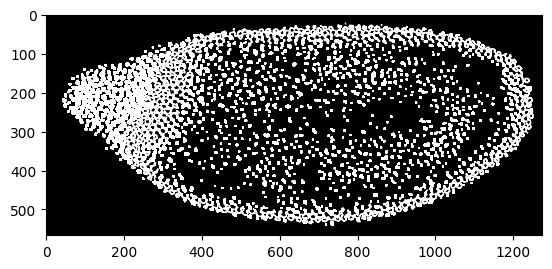

In [22]:
mascara_sobel_x = np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]])

mascara_sobel_y = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])
	
sobel_x = aplicar_convolucao(img_binarizada_otsu, mascara_sobel_x)
sobel_y = aplicar_convolucao(img_binarizada_otsu, mascara_sobel_y)

image_sobel = np.sqrt(sobel_x**2 + sobel_y**2)
image_sobel = (image_sobel / image_sobel.max()) * 255

# Normaliza a imagem Sobel para o intervalo [0, 255] e converte para uint8
image_sobel = cv2.normalize(image_sobel, None, 0, 255, cv2.NORM_MINMAX)
image_sobel = np.uint8(image_sobel)

ret, markers = cv2.connectedComponents(image_sobel)

plt.imshow(markers, cmap='gray', vmin=0, vmax=1)

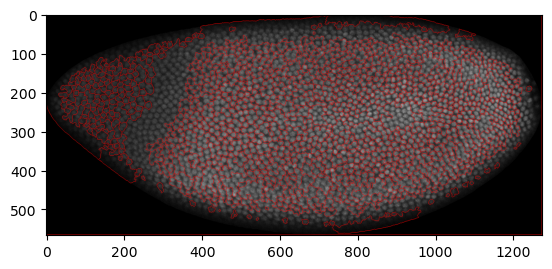

In [78]:
# Converte os marcadores para int32, como o Watershed espera
markers = np.int32(markers)

# Converte a imagem original para colorida (3 canais) para usar no Watershed
img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Aplica o algoritmo Watershed
markers = cv2.watershed(img_color, markers)

# Desenha os contornos em vermelho
img_color[markers == -1] = [255, 0, 0]

plt.imshow(img_color, cmap='gray', vmin=0, vmax=255)

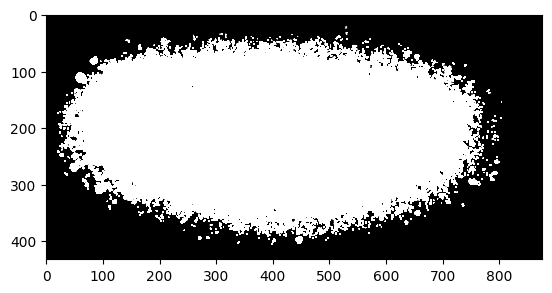

In [26]:
img2 = cv2.imread("image2.jpg", cv2.IMREAD_GRAYSCALE)
# Marca os componentes conectados
img_binarizada_otsu2, threshold = apply_otsu_manual(img2)
ret2, markers2 = cv2.connectedComponents(img_binarizada_otsu2)

plt.imshow(markers2, cmap='gray', vmin=0, vmax=1)

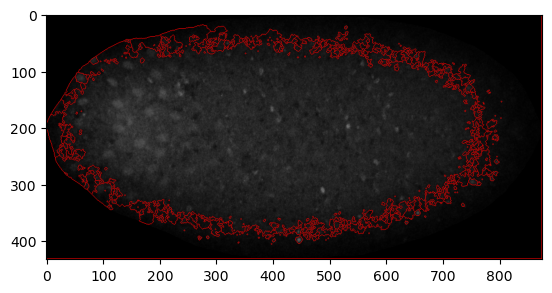

In [80]:
# Converte os marcadores para int32, como o Watershed espera
markers2 = np.int32(markers2)

# Converte a imagem original para colorida (3 canais) para usar no Watershed
img_color2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

# Aplica o algoritmo Watershed
markers2 = cv2.watershed(img_color2, markers2)

# Desenha os contornos em vermelho
img_color2[markers2 == -1] = [255, 0, 0]

plt.imshow(img_color2, cmap='gray', vmin=0, vmax=255);

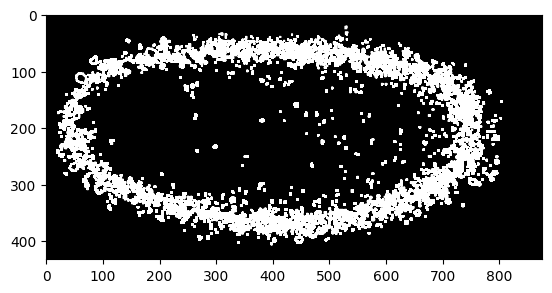

In [27]:
sobel_x = aplicar_convolucao(img_binarizada_otsu2, mascara_sobel_x)
sobel_y = aplicar_convolucao(img_binarizada_otsu2, mascara_sobel_y)

image_sobel2 = np.sqrt(sobel_x**2 + sobel_y**2)
image_sobel2 = (image_sobel2 / image_sobel2.max()) * 255

# Normaliza a imagem Sobel para o intervalo [0, 255] e converte para uint8
image_sobel2 = cv2.normalize(image_sobel2, None, 0, 255, cv2.NORM_MINMAX)
image_sobel2 = np.uint8(image_sobel2)

ret2, markers2 = cv2.connectedComponents(image_sobel2)

plt.imshow(markers2, cmap='gray', vmin=0, vmax=1)

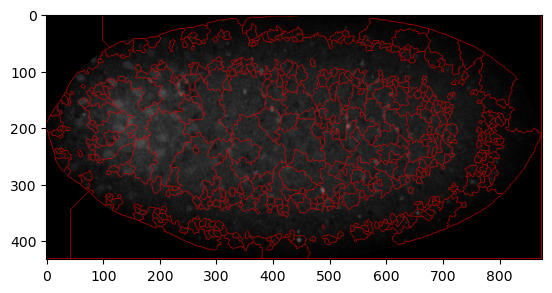

In [82]:
# Converte os marcadores para int32, como o Watershed espera
markers2 = np.int32(markers2)

# Converte a imagem original para colorida (3 canais) para usar no Watershed
img_color2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

# Aplica o algoritmo Watershed
markers2 = cv2.watershed(img_color2, markers2)

# Desenha os contornos em vermelho
img_color2[markers2 == -1] = [255, 0, 0]

plt.imshow(img_color2, cmap='gray', vmin=0, vmax=255)

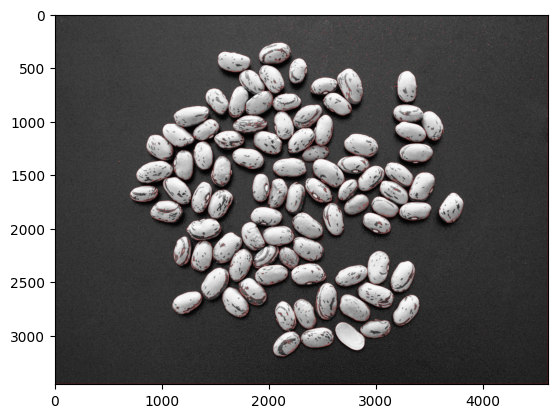

In [28]:
img3 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

# Marca os componentes conectados
img_binarizada_otsu3, threshold = apply_otsu_manual(img3)
ret3, markers3 = cv2.connectedComponents(img_binarizada_otsu3)

# Converte os marcadores para int32, como o Watershed espera
markers3 = np.int32(markers3)

# Converte a imagem original para colorida (3 canais) para usar no Watershed
img_color3 = cv2.cvtColor(img3, cv2.COLOR_GRAY2BGR)

# Aplica o algoritmo Watershed
markers3 = cv2.watershed(img_color3, markers3)

# Desenha os contornos em vermelho
img_color3[markers3 == -1] = [255, 0, 0]

plt.imshow(img_color3, cmap='gray', vmin=0, vmax=255)

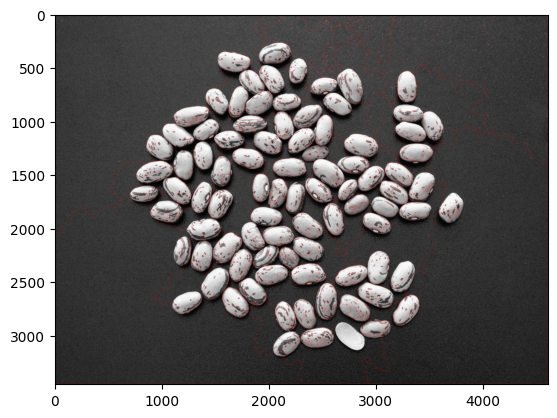

In [29]:
sobel_x = aplicar_convolucao(img_binarizada_otsu3, mascara_sobel_x)
sobel_y = aplicar_convolucao(img_binarizada_otsu3, mascara_sobel_y)

image_sobel3 = np.sqrt(sobel_x**2 + sobel_y**2)
image_sobel3 = (image_sobel3 / image_sobel3.max()) * 255

# Normaliza a imagem Sobel para o intervalo [0, 255] e converte para uint8
image_sobel3 = cv2.normalize(image_sobel3, None, 0, 255, cv2.NORM_MINMAX)
image_sobel3 = np.uint8(image_sobel3)

ret3, markers3 = cv2.connectedComponents(image_sobel3)

# Converte os marcadores para int32, como o Watershed espera
markers3 = np.int32(markers3)

# Converte a imagem original para colorida (3 canais) para usar no Watershed
img_color3 = cv2.cvtColor(img3, cv2.COLOR_GRAY2BGR)

# Aplica o algoritmo Watershed
markers3 = cv2.watershed(img_color3, markers3)

# Desenha os contornos em vermelho
img_color3[markers3 == -1] = [255, 0, 0]

plt.imshow(img_color3, cmap='gray', vmin=0, vmax=255)